In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [79]:
data = pd.read_csv('marketing_AB.csv')
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [80]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

<h3>Этот столбец не несет никакой информации в себе -> выкинем его</h3>

In [82]:
data.isnull().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

<h3>Пропусков в данных нет</h3>

In [83]:
data['user id'].value_counts().unique()

array([1])

In [84]:
data.drop(columns = ['user id'], inplace = True)
data

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


<h3>Этот столбец не несет никакой информации в себе -> выкинем его</h3>

In [85]:
data['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

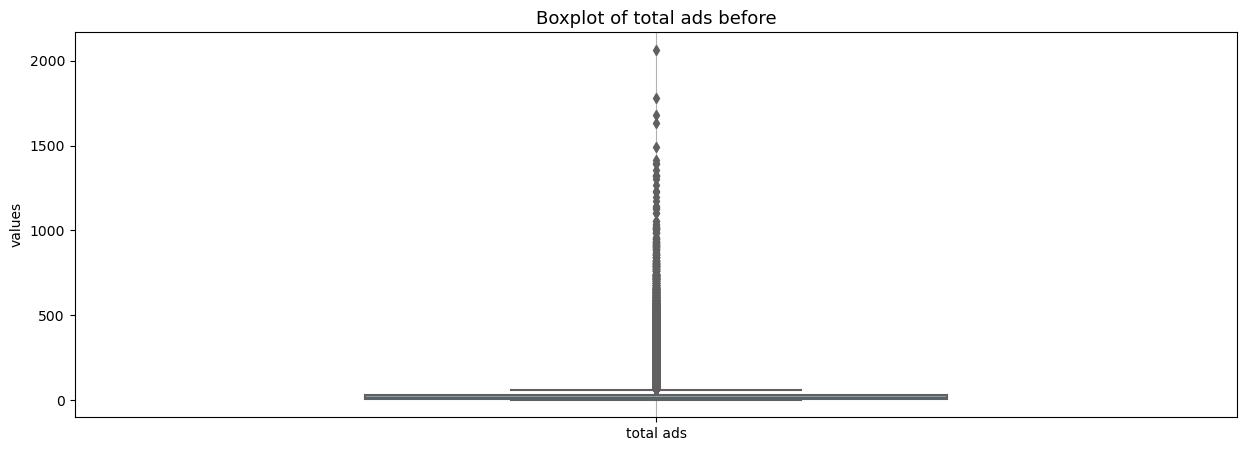

In [86]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = data[['total ads']], palette="Blues", width=0.5)
plt.title('Boxplot of total ads before', fontsize = 13)
plt.grid(axis = 'x')
plt.ylabel('values')
plt.show()

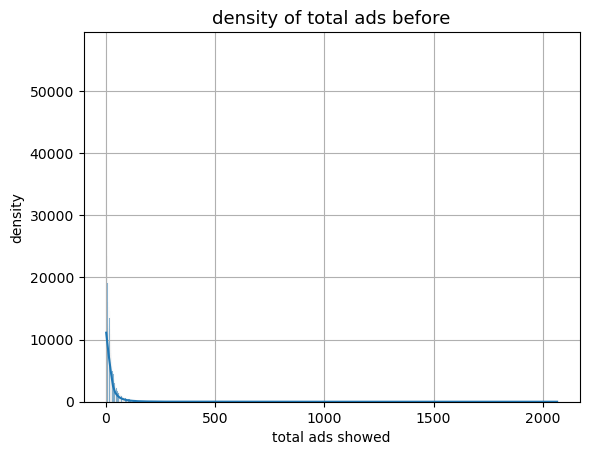

In [87]:
sns.histplot(data = data['total ads'], palette="Blues", kde=True)
plt.title('density of total ads before', fontsize = 13)
plt.xlabel('total ads showed')
plt.ylabel('density')
plt.grid()
plt.show()

In [88]:
from tqdm.notebook import tqdm
perc = [99, 98, 97, 96, 95, 94, 93, 92, 91, 90]

for i in tqdm(perc):
    print(f"При удалении выходящих за {i}% для total ads дисперсия сократится в {round(data['total ads'].std()/data['total ads'][data['total ads'] < data['total ads'].quantile(i/100)].std(), 2)} раз")
    

  0%|          | 0/10 [00:00<?, ?it/s]

При удалении выходящих за 99% для total ads дисперсия сократится в 1.56 раз
При удалении выходящих за 98% для total ads дисперсия сократится в 1.83 раз
При удалении выходящих за 97% для total ads дисперсия сократится в 2.06 раз
При удалении выходящих за 96% для total ads дисперсия сократится в 2.26 раз
При удалении выходящих за 95% для total ads дисперсия сократится в 2.44 раз
При удалении выходящих за 94% для total ads дисперсия сократится в 2.62 раз
При удалении выходящих за 93% для total ads дисперсия сократится в 2.8 раз
При удалении выходящих за 92% для total ads дисперсия сократится в 2.97 раз
При удалении выходящих за 91% для total ads дисперсия сократится в 3.15 раз
При удалении выходящих за 90% для total ads дисперсия сократится в 3.3 раз


In [89]:
print(data['total ads'].quantile(0.99))
data[data['total ads'] < 202].shape[0] / data.shape[0]

202.0


0.9899932154510875

In [90]:
data = data[data['total ads'] < 202]
data

,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
7,ad,False,17,Sunday,18
8,ad,False,21,Tuesday,19
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


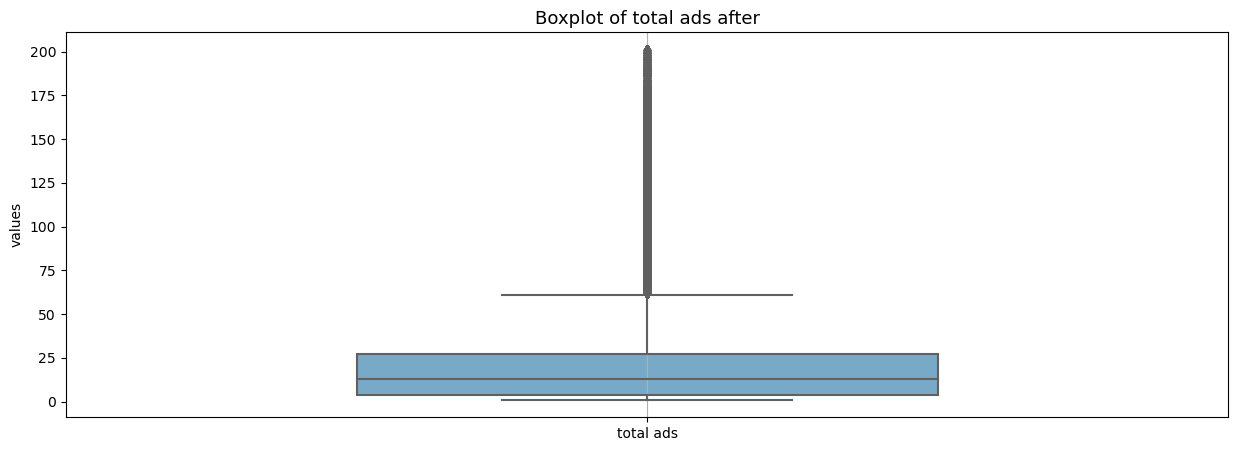

In [91]:
plt.figure(figsize = [15, 5])
sns.boxplot(data = data[['total ads']], palette="Blues", width=0.5)
plt.title('Boxplot of total ads after', fontsize = 13)
plt.grid(axis = 'x')
plt.ylabel('values')
plt.show()

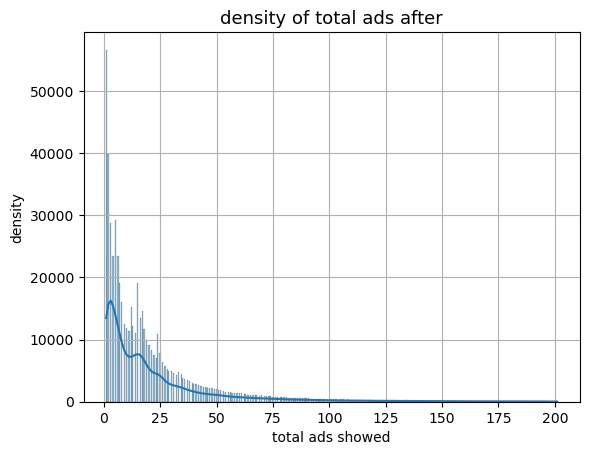

In [92]:
sns.histplot(data = data['total ads'], palette="Blues", kde=True)
plt.title('density of total ads after', fontsize = 13)
plt.xlabel('total ads showed')
plt.ylabel('density')
plt.grid()
plt.show()

<h3>Сократили дисперсию у одного из признаков -> далее это и будет наша метрика</h3>

In [93]:
data['test group'].value_counts()

ad     558946
psa     23270
Name: test group, dtype: int64

In [94]:
def values_count(column):
    plt.figure(figsize = [15, 5])
    sns.countplot(data=data, x=column, palette="plasma")
    plt.title(f'Value Count - {column}', fontsize = 13)
    plt.grid(axis = 'y')
    plt.show()

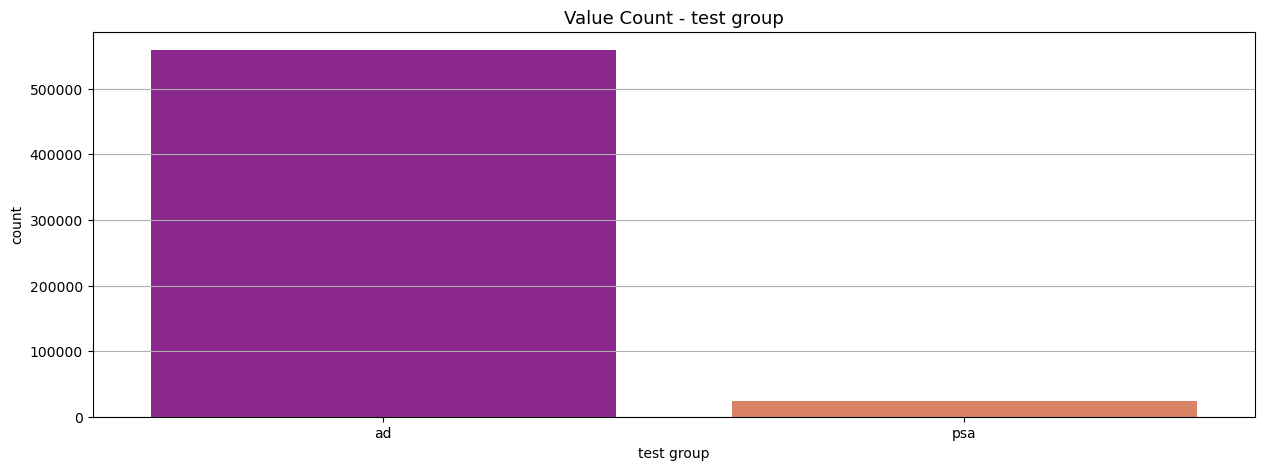

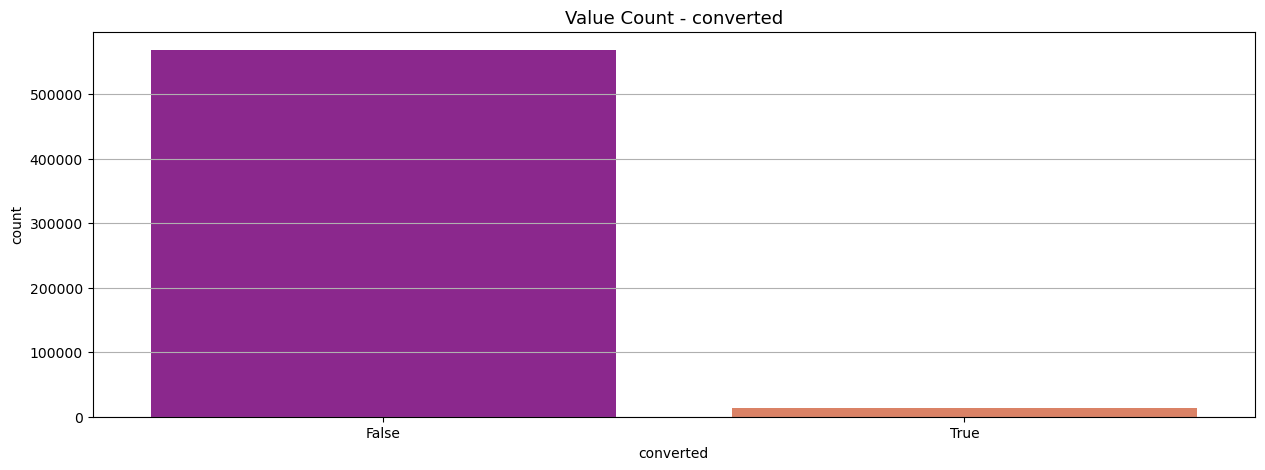

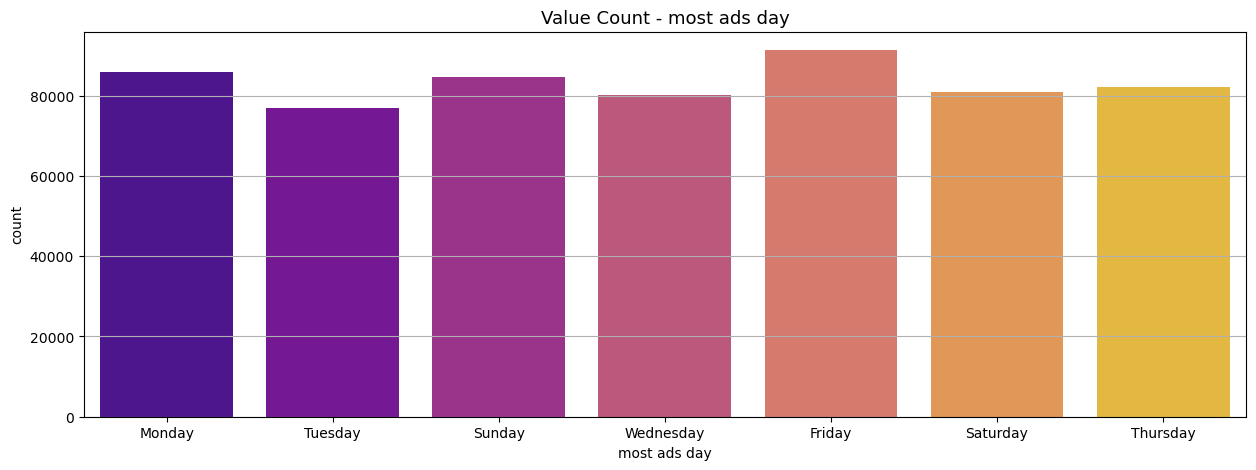

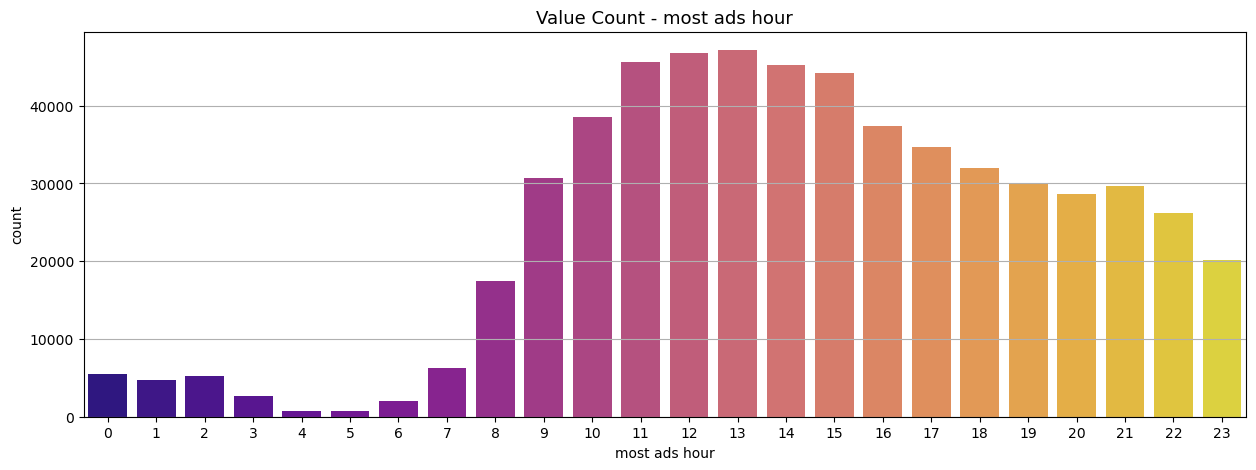

In [95]:
columns_list = data.columns[[0,1,3,4]]
for i in columns_list:
    values_count(i)

<h3>test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement</h3>

<h3>Converted: If a person bought the product then True, else is False</h3>

<h3>most ads day: Day that the person saw the biggest amount of ads</h3>

<h3>most ads hour: Hour of day that the person saw the biggest amount of ads</h3>

In [96]:
data.groupby('test group')['converted'].value_counts()

test group  converted
ad          False        545402
            True          13544
psa         False         22890
            True            380
Name: converted, dtype: int64

In [97]:
pie = pd.DataFrame(
    {
        'groups': ['ad False', 'ad True', 'psa False', 'psa True'],
        'number of people': [550154, 14423, 23104, 420]
    }
)
pie

,groups,number of people
0,ad False,550154
1,ad True,14423
2,psa False,23104
3,psa True,420


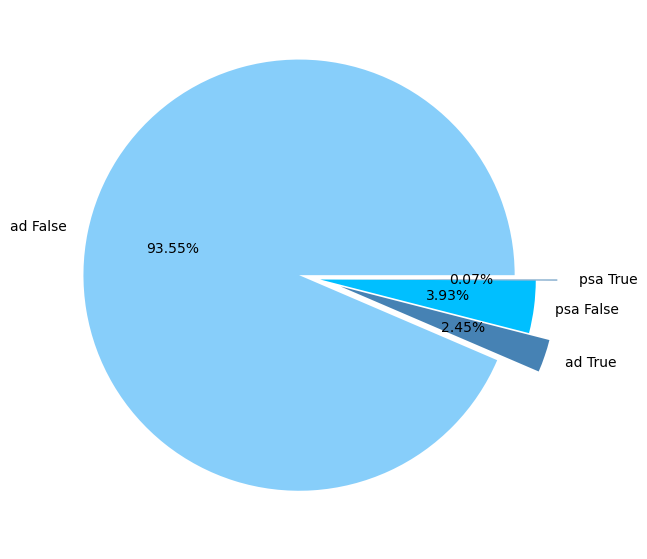

In [98]:
plt.figure(figsize = [7, 7])
plt.pie(
    x = pie['number of people'],
    labels = pie['groups'],
    explode = [0.1, 0.1, 0, 0.1], 
    colors = ['lightskyblue', 'steelblue', 'deepskyblue','steelblue'],
    autopct = '%1.2f%%', 
    pctdistance = 0.6, 
    labeldistance = 1.1, 
)
plt.title('')
plt.show()

In [99]:
data['converted'].value_counts()

False    568292
True      13924
Name: converted, dtype: int64

In [105]:
data['converted'] = data['converted'].astype(int)

In [106]:
data

,test group,converted,total ads,most ads day,most ads hour
0,ad,0,130,Monday,20
1,ad,0,93,Tuesday,22
2,ad,0,21,Tuesday,18
7,ad,0,17,Sunday,18
8,ad,0,21,Tuesday,19
...,...,...,...,...,...
588096,ad,0,1,Tuesday,23
588097,ad,0,1,Tuesday,23
588098,ad,0,3,Tuesday,23
588099,ad,0,1,Tuesday,23


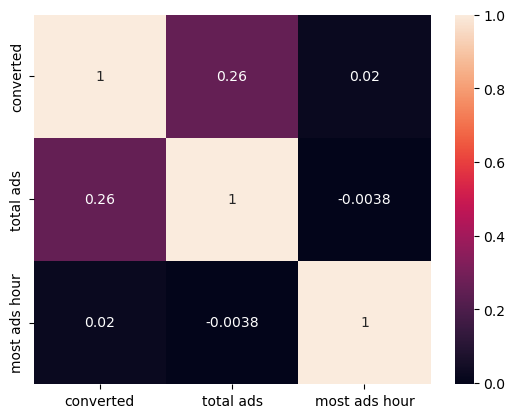

In [107]:
sns.heatmap(data = data[['converted', 'total ads', 'most ads hour']].corr(), annot = True)
plt.show()

In [108]:
data_converted = data[data['converted'] == True]
data_converted

,test group,converted,total ads,most ads day,most ads hour
15,ad,1,9,Wednesday,18
160,ad,1,163,Saturday,6
169,ad,1,164,Friday,21
220,ad,1,131,Sunday,17
283,ad,1,167,Sunday,14
...,...,...,...,...,...
586343,ad,1,14,Tuesday,17
586818,psa,1,11,Tuesday,15
586990,psa,1,8,Tuesday,16
587069,ad,1,4,Tuesday,16


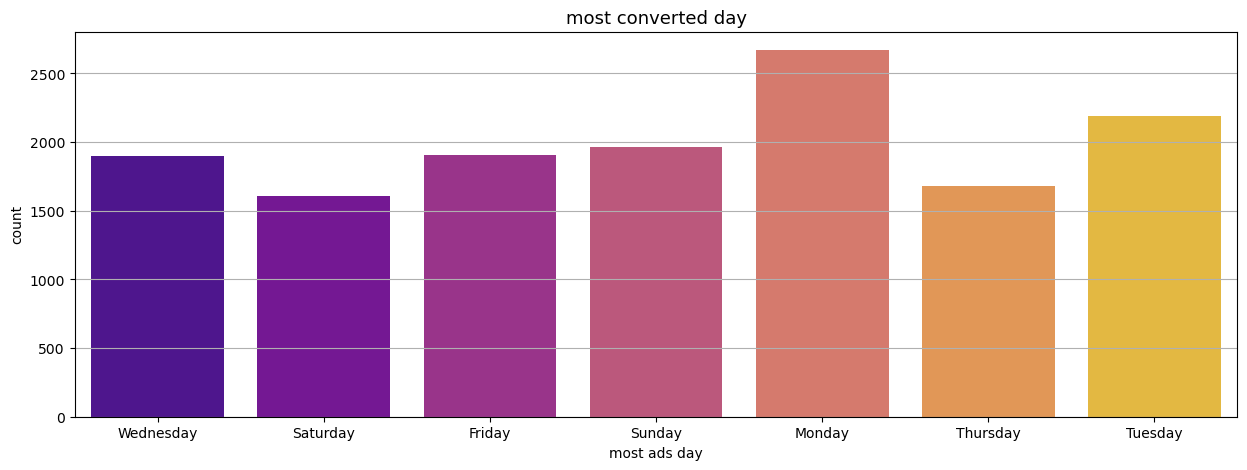

In [114]:
plt.figure(figsize = [15, 5])
sns.countplot(data=data_converted, x='most ads day', palette="plasma")
plt.title('most converted day', fontsize = 13)
plt.grid(axis = 'y')
plt.show()

<h3>Узнали, что больше всего конверсий происходит в понедельник</h3>

In [116]:
df = pd.DataFrame(data.groupby('most ads day')['converted'].mean())
df.reset_index(inplace = True)

In [117]:
df

,most ads day,converted
0,Friday,0.020865
1,Monday,0.031034
2,Saturday,0.019833
3,Sunday,0.023210
4,Thursday,0.020454
5,Tuesday,0.028525
6,Wednesday,0.023749


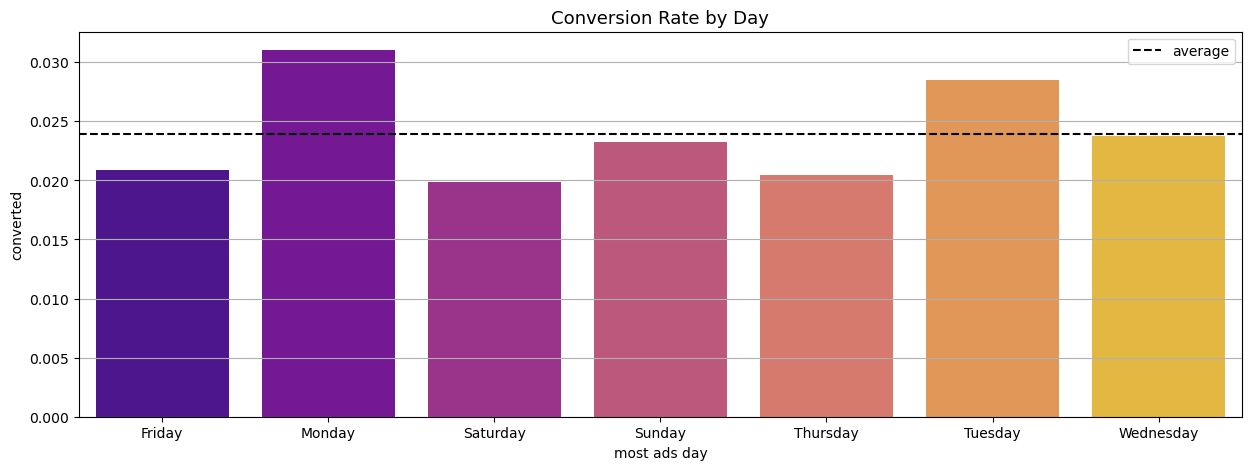

In [124]:
plt.figure(figsize = [15, 5])
sns.barplot(data=df, y = 'converted', x = 'most ads day', palette="plasma")
plt.title('Conversion Rate by Day', fontsize = 13)
plt.axhline(df['converted'].mean(), color = 'black', linestyle = '--', label = 'average')
plt.legend()
plt.grid(axis = 'y')
plt.show()

<h3>Узнали относительную конверсию за все дни</h3>

<h2>A/B</h2>

In [127]:
treatment = data[data['test group'] == 'ad']
control = data[data['test group'] == 'psa']
print(treatment.shape, control.shape)

(558946, 5) (23270, 5)


In [131]:
treatment.describe()

,converted,total ads,most ads hour
count,558946.000000,558946.000000,558946.000000
mean,0.024231,21.791137,14.480907
std,0.153767,27.986971,4.843506
min,0.000000,1.000000,0.000000
25%,0.000000,4.000000,11.000000
50%,0.000000,13.000000,14.000000
75%,0.000000,27.000000,18.000000
max,1.000000,201.000000,23.000000


In [132]:
control.describe()

,converted,total ads,most ads hour
count,23270.000000,23270.000000,23270.000000
mean,0.016330,21.707263,14.306833
std,0.126744,29.182355,4.659801
min,0.000000,1.000000,0.000000
25%,0.000000,4.000000,11.000000
50%,0.000000,11.000000,14.000000
75%,0.000000,26.000000,18.000000
max,1.000000,201.000000,23.000000


<h3>Будем пользоваться бутстрапом для проведения а/б тестирования</h3>

In [146]:
def bootstrap_data(data, size = 1_000):
    sample = data.sample(size, replace=True).values
    return sample.mean()

In [177]:
n_it = 10_000

treatment_mean = []
control_mean = []

for i in tqdm(range(n_it)):
    treatment_mean.append(bootstrap_data(treatment.converted, 10_000)) 
    control_mean.append(bootstrap_data(control.converted, 10_000))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [178]:
data_bootstrap = pd.DataFrame({'treatment':treatment_mean,
                             'control':control_mean})

In [179]:
data_bootstrap

,treatment,control
0,0.0251,0.0153
1,0.0244,0.0162
2,0.0233,0.0167
3,0.0237,0.0139
4,0.0230,0.0144
...,...,...
9995,0.0248,0.0154
9996,0.0225,0.0164
9997,0.0255,0.0150
9998,0.0267,0.0158


In [188]:
def density(column):
    plt.figure(figsize = [15, 5])
    sns.histplot(data=data_bootstrap, x=column, palette="plasma", kde = True)
    plt.title(f'density mean - {column}', fontsize = 13)
    plt.xlabel('mean values')
    plt.ylabel('density')
    plt.grid()
    plt.show()

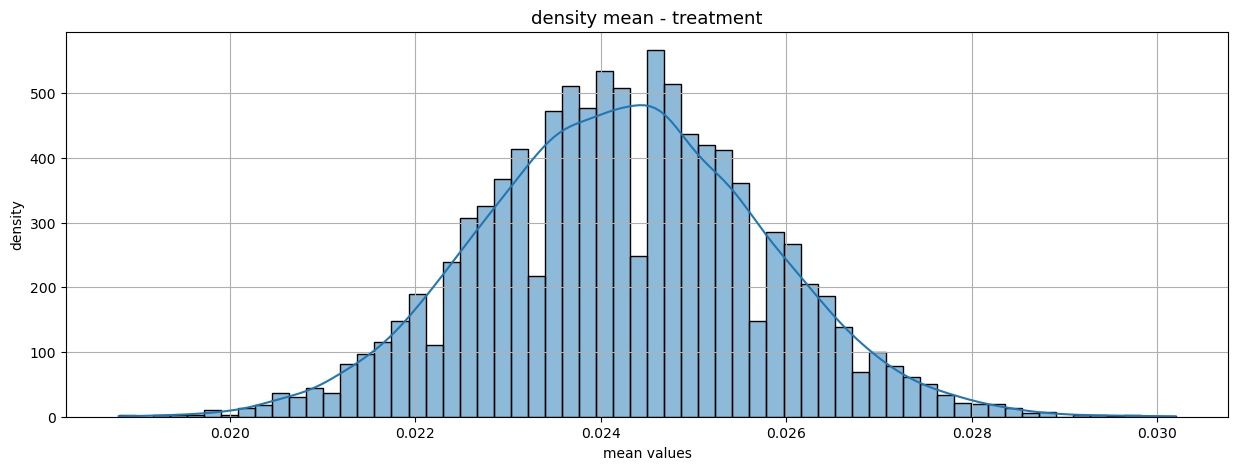

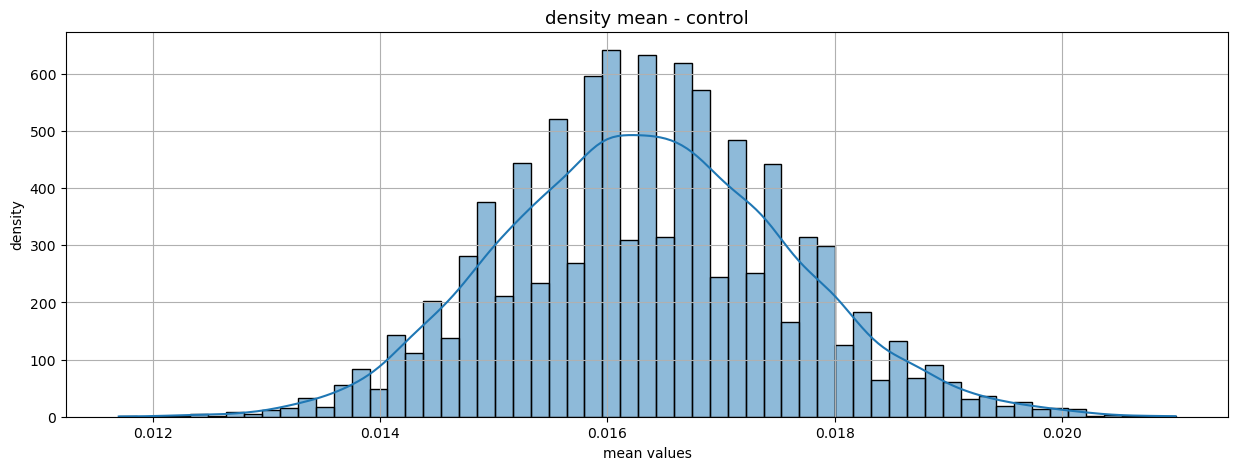

In [189]:
columns_list1 = data_bootstrap.columns[[0,1]]
for i in columns_list1:
    density(i)

Так как распределение средних - нормальное можем сравнить две выборки с помощью t-test'a

H0: среднее двух выборок не отличается

H1: среднее двух выборок отличается

Уровень значимости установим 95%

In [182]:
from scipy.stats import ttest_ind, levene
levene(data_bootstrap.control, data_bootstrap.treatment)

LeveneResult(statistic=287.07616392832676, pvalue=6.024695649514455e-64)

In [183]:
ttest_ind(data_bootstrap.control, data_bootstrap.treatment, alternative='two-sided')

Ttest_indResult(statistic=-400.3993108540707, pvalue=0.0)

Дисперсии по тесту левена являются гомогенными, ттест в свою очередь показал, что есть статистические различия между двумя группами(p-value < 0.05)